In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

$$d{\Pi_{s}} = \kappa_{\Pi} \left(\theta_{\Pi}(s) + \frac{1}{\kappa_{\Pi}} \frac{d\theta_{\Pi}}{ds}(s) - \Pi_s\right) ds + \sigma_{\Pi, v} \Pi_s dB_{v, s} + \sigma_{\Pi, \Pi} \Pi_s dB_{\Pi, s}$$

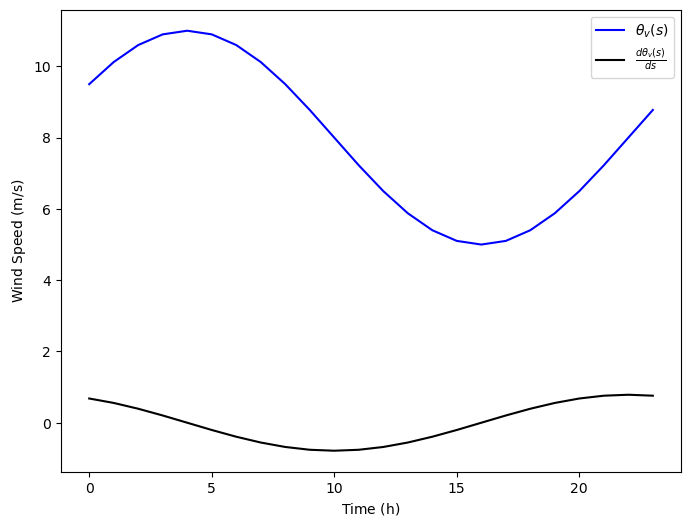

In [3]:
T = 24
h = 1
N = int(T / h)
k_pi = 0.04 / h
sigma_pi_v = 0.01
sigma_pi_pi = 0.075

theta_v_bar = 8
alpha_v = 0.375
gamma = np.pi / (12 * h)
psi_v = 2 / h

theta_v = lambda s: theta_v_bar * (1 + alpha_v * np.sin(gamma*(s + psi_v)))
dtheta_v = lambda s: theta_v_bar * alpha_v * np.cos(gamma * (s + psi_v)) * gamma
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, T, h), theta_v(np.arange(0, T, h)), color = "blue", label = r'$\theta_v(s)$')
plt.plot(np.arange(0, T, h), dtheta_v(np.arange(0, T, h)), color = "black", label = r'$\frac{d\theta_v(s)}{ds}$')
plt.xlabel(r'$\text{Time (h)}$')
plt.ylabel(r'$\text{Wind Speed (m/s)}$')
plt.legend()
plt.show()

In [4]:
def price_sde(T, h, k_pi, sigma_pi_v, sigma_pi_pi):

    '''
    Simulation of the price process:
    
    T: total time
    h: time step size
    k_pi: mean reversion rate for price
    sig_pi_v: correlation of electricity price and wind speed
    sig_pi_pi: volatility of the price process
    wind_BM: standard brownian motion for the wind power
    price_BM: standard brownian motion for the spot price
    '''

    N = int(T/h)
    cov = np.reshape(np.array([1, 0, 0, 1]), (2,2))
    brownianmotion = np.random.multivariate_normal([0,0], cov, size=N)

    theta_v = lambda s: theta_v_bar * (1 + alpha_v * np.sin(gamma*(s + psi_v)))
    dtheta_v = lambda s: theta_v_bar * alpha_v * np.cos(gamma * (s + psi_v)) * gamma

    s = 0 
    price = np.zeros(N + 1)
    price[0] = np.random.normal(theta_v(0), 0.075)
    
    for i in range(1, N + 1):
        price[i] = price[i - 1] + k_pi * (theta_v(s) + 1/k_pi * dtheta_v(s) - price[i - 1]) * h \
            + np.sqrt(h) * sigma_pi_v * price[i - 1] * brownianmotion[i-1, 0] \
            + np.sqrt(h) * sigma_pi_pi * price[i-1] * brownianmotion[i-1, 1]
        s += h
    return price



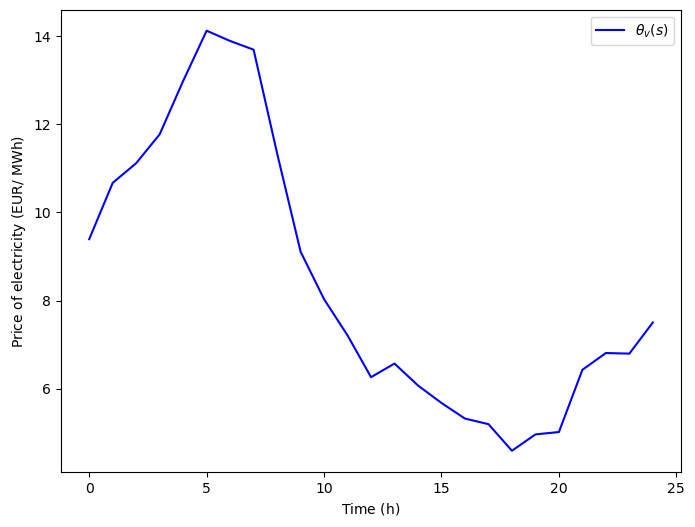

In [5]:
T = 24
h = 1
k_pi = 0.04 / h
sigma_pi_v = 0.01
sigma_pi_pi = 0.075
price_process = price_sde(T, h, k_pi, sigma_pi_v, sigma_pi_pi)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, T+h, h), price_process, color = "blue", label = r'$\theta_v(s)$')
plt.xlabel(r'$\text{Time (h)}$')
plt.ylabel(r'$\text{Price of electricity (EUR/ MWh)}$')
plt.legend()
plt.show()

In [24]:
# simulations
h = 0.1
simulation_times = 1000
prices = np.zeros(simulation_times * (int(T / h) + 1))
prices = np.reshape(prices, (simulation_times, int(T/h) + 1))
for i in range(simulation_times):
    prices[i] = price_sde(T, h, k_pi, sigma_pi_v, sigma_pi_pi)
expected_value = np.mean(prices, axis=0)
print(expected_value)

[ 9.50243817  9.58188031  9.65115751  9.7219212   9.78961255  9.83317005
  9.89453813  9.95557704 10.03267983 10.09560228 10.16292505 10.21266992
 10.27335365 10.31696415 10.36292195 10.40572011 10.45566868 10.4943414
 10.52454704 10.57563566 10.61675288 10.66301746 10.69655042 10.71906279
 10.75089905 10.77147175 10.80631979 10.83800455 10.85015776 10.86823648
 10.88912491 10.91029445 10.93673403 10.94872297 10.95314253 10.96962137
 10.9752729  10.99261895 11.0029598  11.00808923 11.01140114 11.02847649
 11.03874675 11.0379644  11.05348265 11.04514419 11.04516072 11.03714872
 11.03711088 11.01144715 10.989054   10.97218081 10.95198648 10.93429228
 10.89500699 10.87383224 10.8640707  10.83894069 10.8192665  10.79277222
 10.74552627 10.69472297 10.65319932 10.61546084 10.56780232 10.51473084
 10.46783151 10.42141207 10.36184366 10.31201944 10.2708863  10.21044024
 10.15303897 10.08173175 10.0120843   9.95405176  9.89133487  9.83002323
  9.76448596  9.70691483  9.65281116  9.59471064  9.

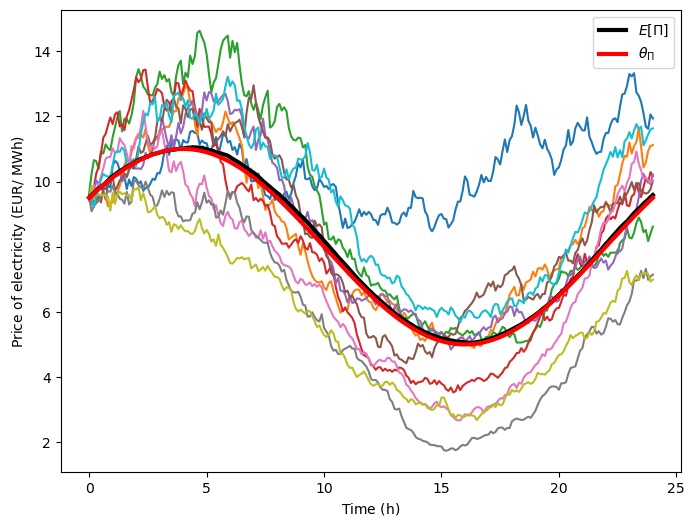

In [25]:
# print(prices)
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(np.arange(0, T+h, h), prices[i])
plt.plot(np.arange(0, T+h, h), expected_value, color='black', linewidth = 3, label=r'$E[\Pi]$')
plt.plot(np.arange(0, T+h, h), theta_v(np.arange(0, T+h, h)), color="red", linewidth = 3, label = r'$\theta_{\Pi}$')
plt.xlabel(r'$\text{Time (h)}$')
plt.ylabel(r'$\text{Price of electricity (EUR/ MWh)}$')
plt.legend()
plt.show()